In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
from math import sqrt
SPINE_COLOR = 'gray'

import warnings
warnings.filterwarnings('ignore')

In [2]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.33 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': [r'\usepackage{gensymb}'],
              'axes.labelsize': 10, # fontsize for x and y labels (was 10)
              'axes.titlesize': 10,
              'font.size': 10, # was 10
              'legend.fontsize': 10, # was 10
              'xtick.labelsize': 10,
              'ytick.labelsize': 10,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

In [3]:
var_list = ['tmax', 'tmean', 'tmin',  'slp']

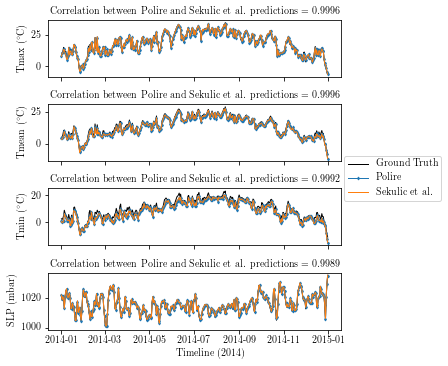

In [55]:
latexify(5, 5)
fig, ax = plt.subplots(4,1, sharex=True)
ax = ax.ravel()
fl = ['(a)', '(b)', '(c)', '(d)']
yl = ['Tmax ($^\circ$C)', 'Tmean ($^\circ$C)', 'Tmin ($^\circ$C)', 'SLP (mbar)']
for i in range(4):
    var = var_list[i]
    var_data = pd.read_csv('../../results/experiment-2/ogimet_'+var+'.csv')
    var_data['date'] = pd.to_datetime(var_data['date'].apply(lambda x: str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:]))
    auth_data = pd.read_csv('../../data/serbia/result_'+var+'.csv.gz')
    auth_data['date'] = pd.to_datetime(auth_data['date'])
    auth_data = auth_data.sort_values('date')
    for data in [var_data, auth_data]:
        tmp_df = data[data.staid == 13274] # Beograd station
        tmp_df['year'] = tmp_df['date'].apply(lambda x: str(x)[:4])
        tmp_df = tmp_df[tmp_df.year == '2014']
        try:
            ax[i].plot(tmp_df.date, tmp_df[var].values, label='Ground Truth', linewidth=1, color='k')
            ax[i].plot(tmp_df.date, tmp_df['pred'].values, 'd-', label='Polire', linewidth=1, markersize=2)
            ours = tmp_df['pred'].values
#             print(len(ours), len(tmp_df[var].values))
        except:
            ax[i].plot(tmp_df.date, tmp_df['pred'].values, label='Sekulic et al.', linewidth=1)
            authors = tmp_df['pred'].values
#             print(len(authors))
    if var != 'slp':
        ax[i].set_title('Correlation between Polire and Sekulic et al. predictions = '+ str(np.corrcoef(ours, authors).round(4)[0,1]))
    else:
        ax[i].set_title('Correlation between Polire and Sekulic et al. predictions = '+ str(np.corrcoef(ours, authors).round(4)[0,1]))
    if i==0:
        lgd = fig.legend(bbox_to_anchor=(1.25,0.57))
    
    ax[i].set_ylabel(yl[i])
        
xlb = fig.text(0.5,0,'Timeline (2014)')
plt.subplots_adjust(hspace=0.2)
plt.tight_layout()

plt.savefig('../../figures/belgrade.pdf', bbox_extra_artirsts=(lgd,xlb), bbox_inches='tight')